<a href="https://colab.research.google.com/github/rpezoa/mlvalpo/blob/main/regresion_MLvalpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de temperatura efectiva en estrellas masivas

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import time

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Descarga de datos

In [3]:
# Dataset provided by Daniela Turis, IFA-UV.

!gdown https://drive.google.com/uc?id=1m_GajQqDRcKrH8_ExG_0Yp_sQ4MrhZbN

Downloading...
From: https://drive.google.com/uc?id=1m_GajQqDRcKrH8_ExG_0Yp_sQ4MrhZbN
To: /content/df_ZPEKTR_limb_lineal.csv
100% 19.1M/19.1M [00:00<00:00, 107MB/s] 


## Pandas dataframe

In [4]:
data=pd.read_csv('df_ZPEKTR_limb_lineal.csv')
data.head()

,4460.1,4460.2,4460.3,4460.4,4460.5,4460.6,4460.7,4460.8,4460.9,4461.0,...,vsini,M/M⊙,R/R⊙,V/Vc,L*,Ω/Ωc,Tpole,Teq,gpole,geq
0,0.996583,0.996529,0.996452,0.996362,0.996264,0.996160,0.996052,0.995942,0.995830,0.995717,...,228.0,15.0,5.79,0.75,4.105,0.912,28000.0,23690.0,4.20,4.02
1,0.996234,0.996208,0.996180,0.996141,0.996108,0.996074,0.996027,0.995962,0.995851,0.995678,...,309.0,17.0,5.75,0.77,4.230,0.928,30000.0,25014.0,4.25,4.06
2,0.997128,0.996958,0.996770,0.996573,0.996368,0.996163,0.995957,0.995746,0.995530,0.995321,...,254.0,10.0,8.42,0.65,3.857,0.836,19000.0,16859.0,3.63,3.50
3,0.993683,0.993541,0.993413,0.993277,0.993126,0.992986,0.992836,0.992683,0.992531,0.992366,...,351.0,12.0,5.31,0.68,3.351,0.860,18000.0,15772.0,4.12,3.98
4,0.995026,0.994887,0.994749,0.994607,0.994464,0.994324,0.994183,0.994040,0.993885,0.993727,...,310.0,12.0,6.35,0.65,3.778,0.842,21000.0,18578.0,3.96,3.83


### Construcción de matriz $X$ y vector $y$

In [19]:
X = data.iloc[:,0:170] # X matrix containing the flux of the spectral lines
y_input = data.iloc[:,170:176] # input parameters of ZPEKTR
y_output = data.iloc[:,176:] # output parameters of ZPEKTR
y = data.iloc[:,176:179] # y matrix containing the values we want to predict

In [20]:
val_min = np.array(data.columns[:-18]).astype("float").min()
val_max = np.array(data.columns[:-18]).astype("float").max()
print("Wavelength range [", val_min, ",", val_max, "]")

Wavelength range [ 4460.1 , 4477.0 ]


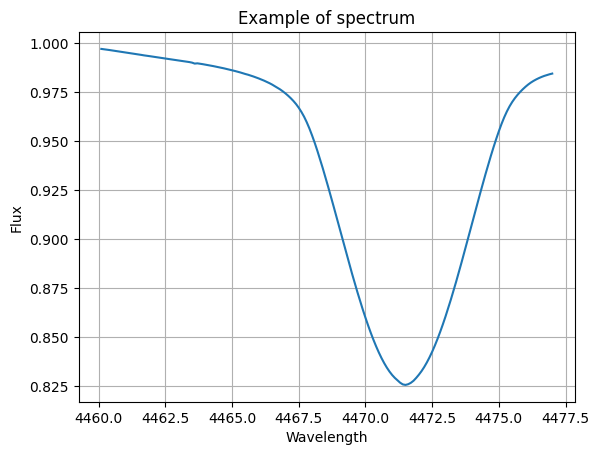

In [21]:
X = data.iloc[:,0:170] # X matrix containing spectral lines (flux)
y_input = data.iloc[:,170:176] # input parameters
y_output = data.iloc[:,176:] # output parameters
y = data.iloc[:,176:179] # y matrix containing the values we want to predict
lambdas = np.array(data.columns[:-18]).astype("float")

plt.figure()
plt.plot(lambdas, X.iloc[2,:])
plt.title("Example of spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.grid()
plt.show()

In [22]:
X_0 = X.values
y_0 = y.values

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

y_scaler = MinMaxScaler()

y = y_scaler.fit_transform(y)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [24]:
X_train.shape, y_train.shape

((6841, 170), (6841, 3))

## Regresión Lineal

Linear Regression Results:
MSE: 0.00
MAE: 0.01
R²: 0.989


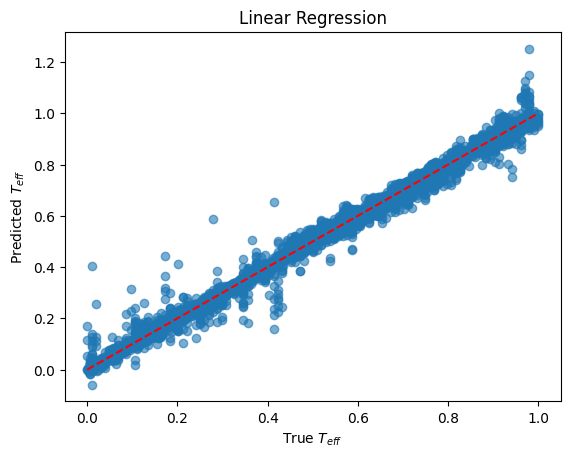

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Linear Regression")
plt.show()

## Decision Tree

Decision Tree Results:
MSE: 0.01
MAE: 0.06
R²: 0.902


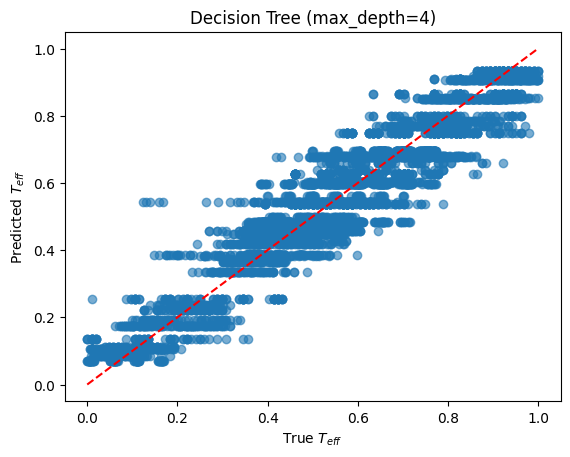

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Decision Tree Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Decision Tree (max_depth=4)")
plt.show()

## Random Forest

Random Forest Results:
MSE: 0.00
MAE: 0.01
R²: 0.997


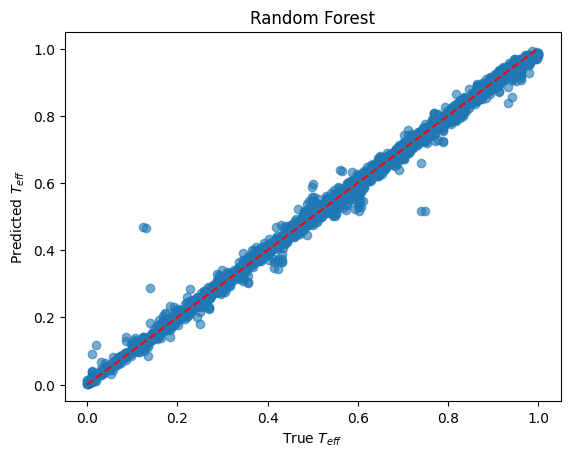

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Random Forest")
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train[])
y_pred2 = gb.predict(X_test)

print("Gradient Boosting Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Gradient Boosting")
plt.show()

ValueError: y should be a 1d array, got an array of shape (6841, 3) instead.

TEST